# Algerian Forest Fires 


* Student: Leonardo Gil - StudentID: C0902422 
AML 

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Load the dataset
file_path = 'C:\\Users\\902422\\Downloads\\Algerian Forest\\Algerian_forest_fires_cleaned.csv'
data = pd.read_csv(file_path)

### Data Cleaning

In [41]:
# Display the first few rows of the dataset to understand its structure
print(data.head())


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [42]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


The details in the dataset belong to:

* day: Day of the month when data was recorded 
* month: Month of the year when data was recorded 
* year:  Year when the data was recorded 
* Temperature: Temperature in Celsius
* RH: Relative Humidity in % -> Amount of  moisture in the air 
* Ws: Wind Speed in km/h  
* Rain: 24h of accumulated precipitation in mm from noon to noon 
* FFMC: Fine Fuel Moisture Code -> Numeric Rating of the moisture content of surface litter and other fuels 
* DMC: Duff Moisture Code -> Rating of the moisture content of decomposing organic material below the surface litter 
* CD: Drought Code: Rating of the moisture content deep in the soil 
* ISI: Initial Spread Index- >Rate at which a fire will spread in its  early stages 
* BUI: Buildup index -> Total amount of fuel available for combustion
* FWI: Fire Weather Index -> Rating of fire intensity. A higher value means a more severe fire weather condition. 
* Classes: Categorial value that indicates if there was or not a fire. 
* Region: Indicates whre the data was collected. 

In [43]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [44]:
print("Missing Values Distribution")
print(data.isnull().sum())

Missing Values Distribution
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [45]:
print("NaN values")
print(data.isna().sum())

NaN values
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [46]:
## Categories in classes
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [47]:
## Encoding of the categories in classes
data['Classes']=np.where(data['Classes'].str.contains('not fire'),0,1)

In [48]:
## categories in classes after encoding
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

### Data Visualization

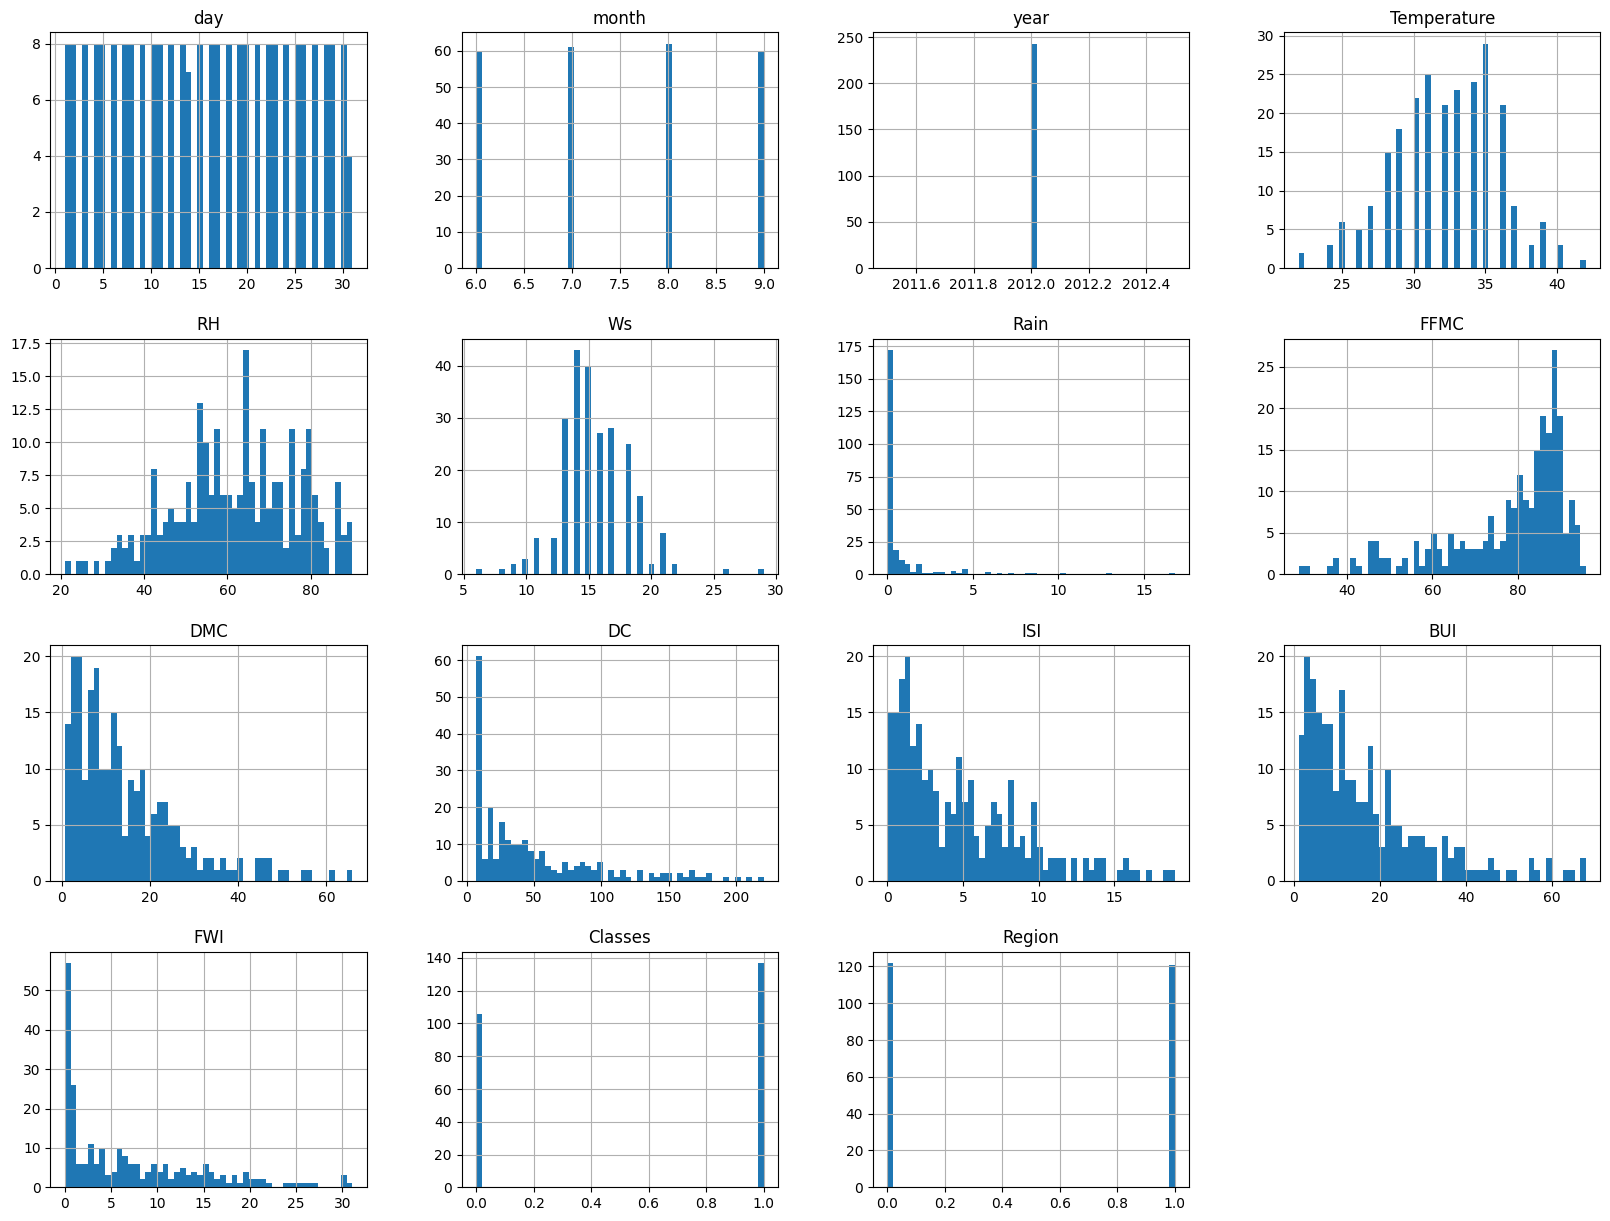

In [49]:
#plot density plot for the data
data.hist(bins=50, figsize=(20,15))
plt.show()


After checking this visuals we reach the conclusion that not all the columns we have are relevant to our model:

 * 'day'
 * 'month' 
 * 'year' 
 
We also have some other columns ('Classes' and 'Region') that might be useful for classification (like predicting if a wild fire will happen or not given specific condictions...) but since this is a regression task working with FWI we can ignore them for now. 

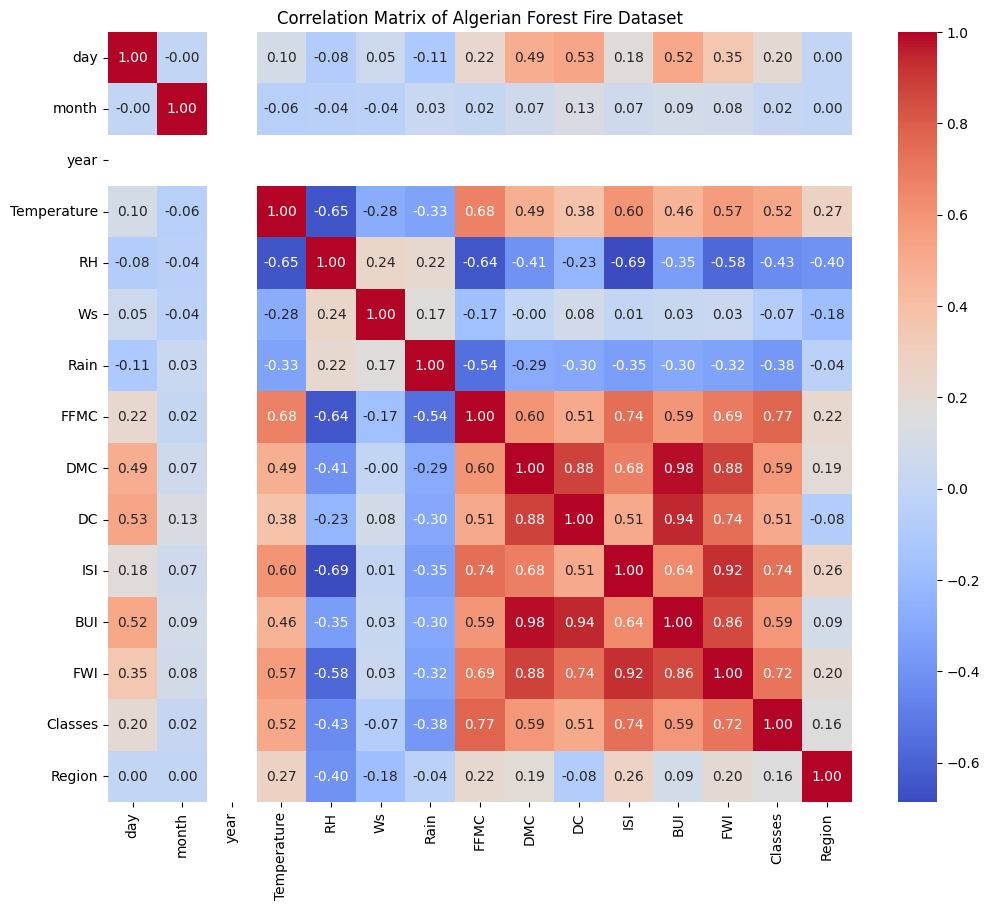

In [50]:
# Compute the correlation matrix to understand the relationship between the features and with FWI 
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Algerian Forest Fire Dataset')
plt.show()


We can notice that FWI has some positive relationships with different features: 
* Temperature
* FFMC
* DMC 
* DC
* ISI 
* BUI 


Off course we can also notice the negative relationship between FWI and two variables that make much sense since they are related with a lower fire risk
* Rain 
* RH

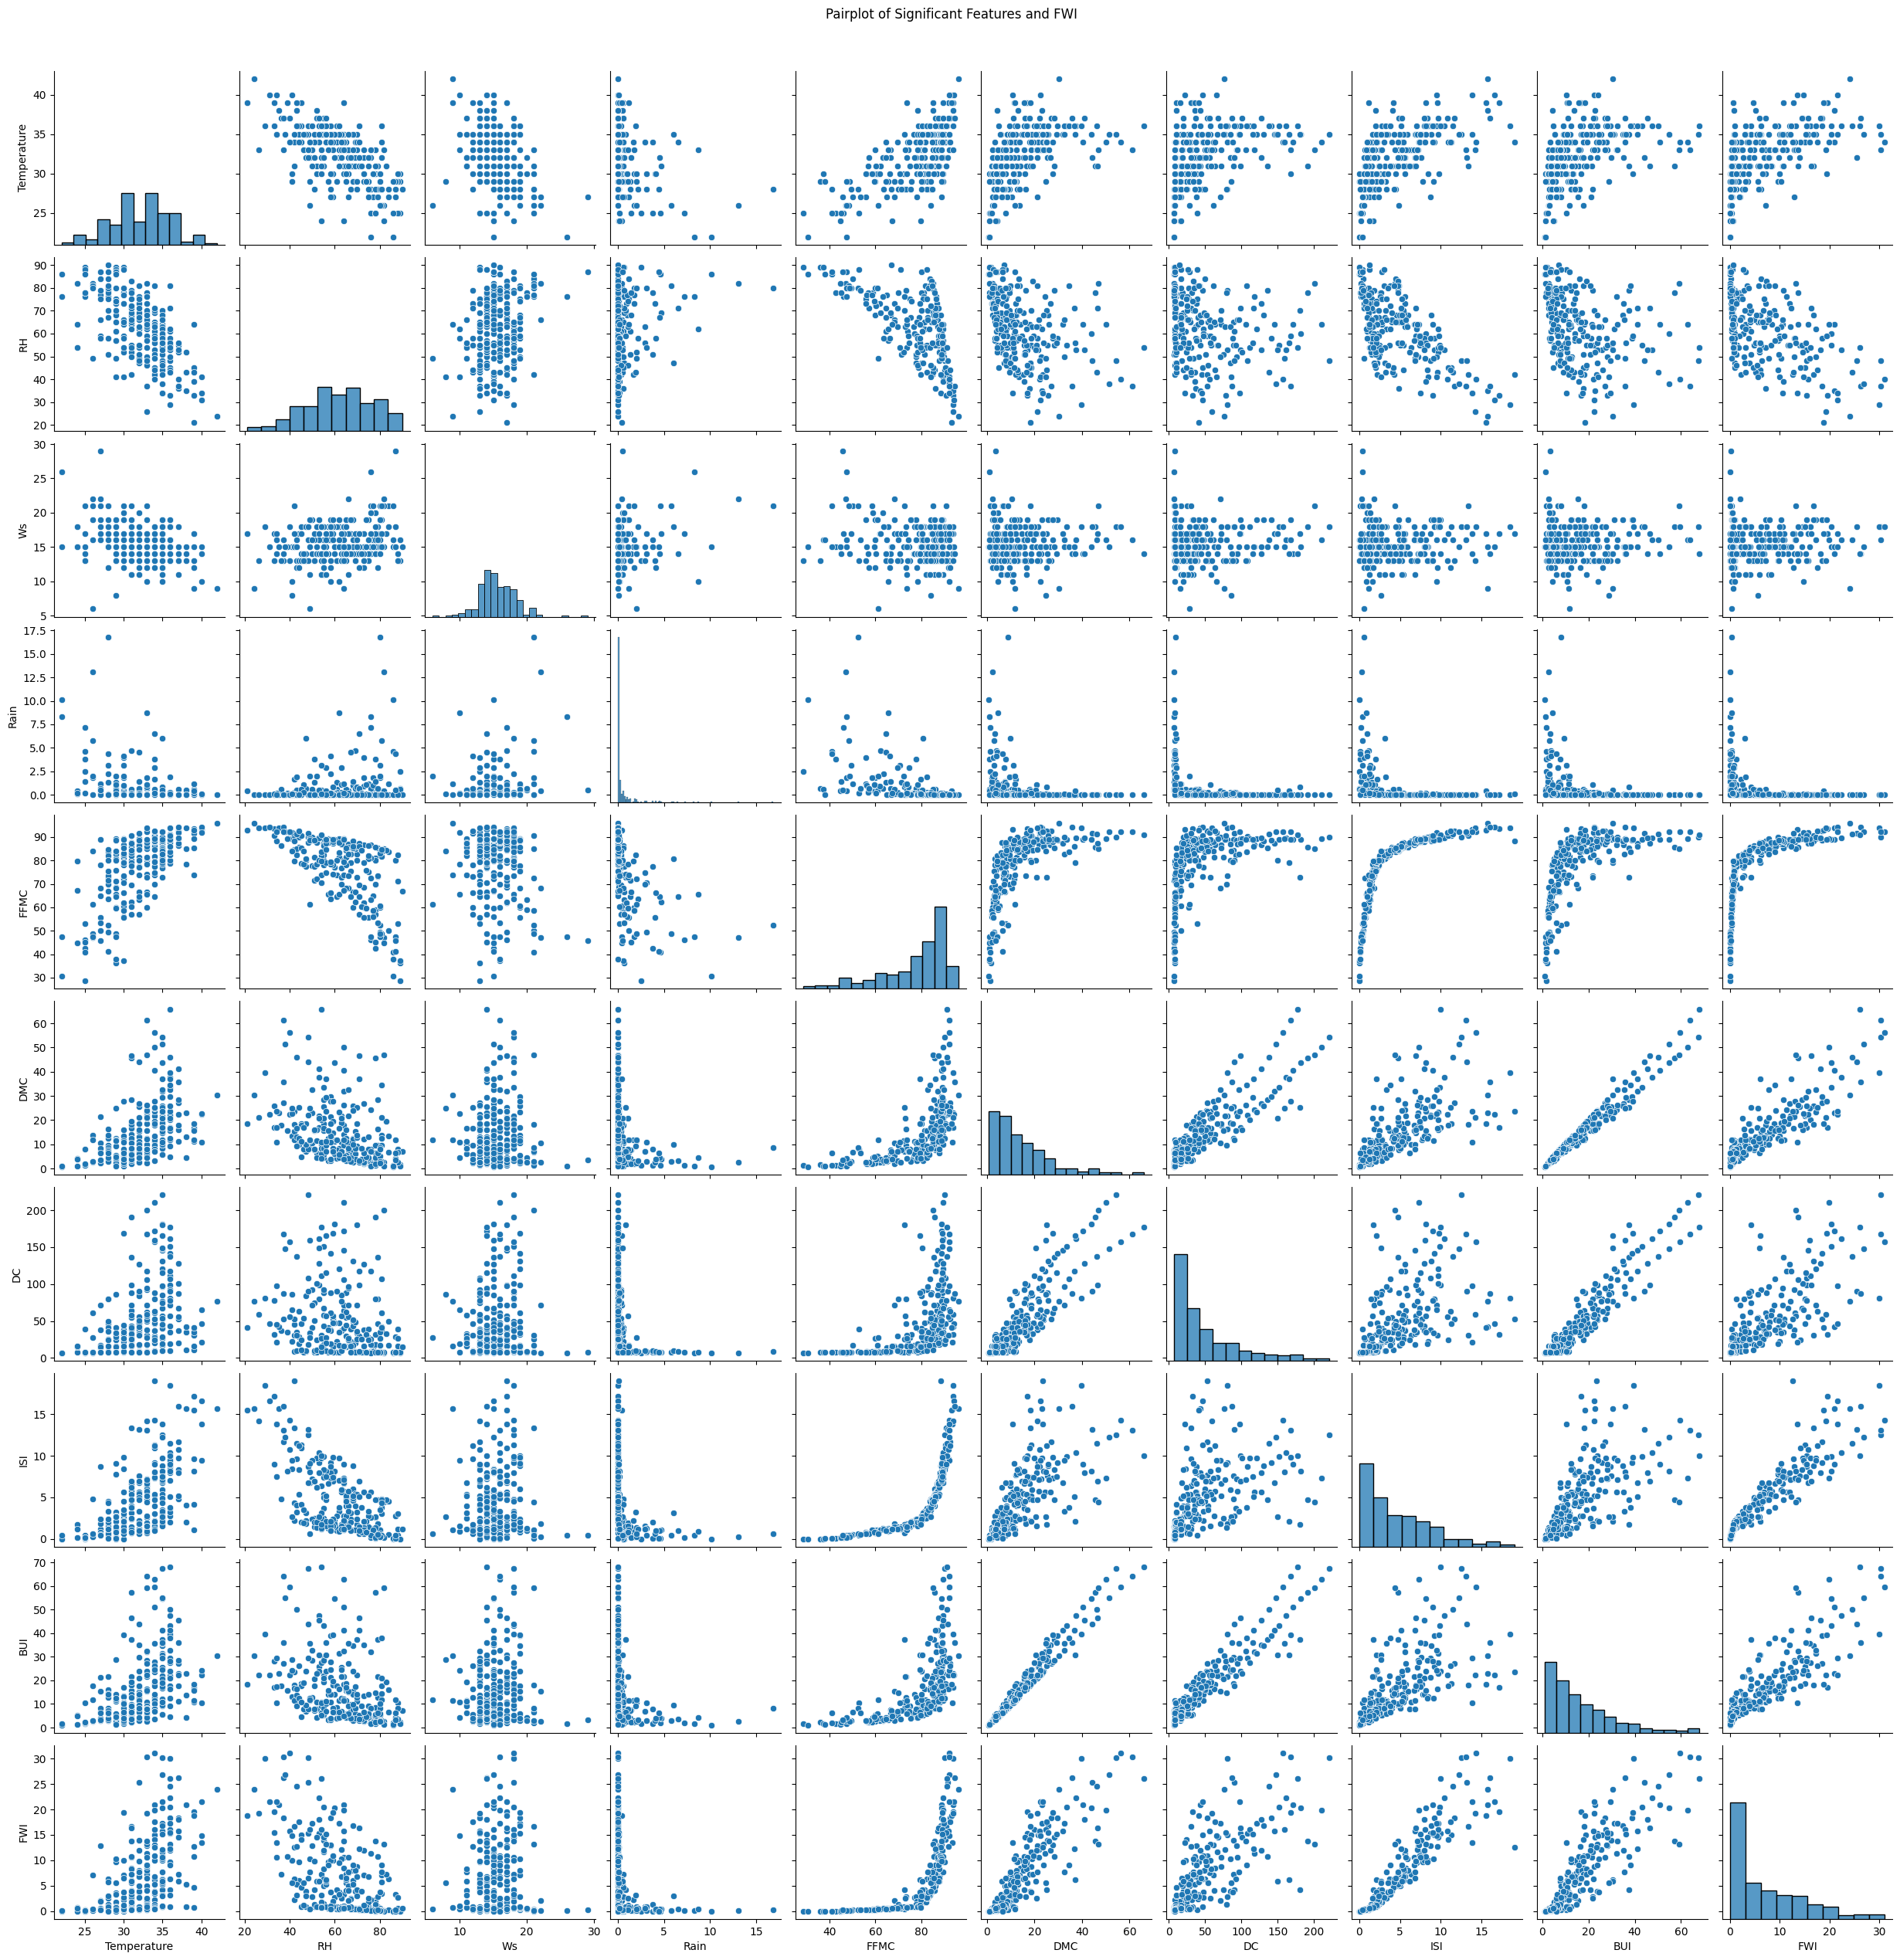

In [51]:
# Pairplot to visualize relationships between significant features and FWI
significant_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
sns.pairplot(data[significant_features])
plt.suptitle('Pairplot of Significant Features and FWI', y=1.02)
plt.show()

### Model Development

We decide here to work only with those variables that we identified are worth including in our model development. 

In [52]:
# Define features and target variable
X = data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
y = data['FWI']

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Multiple Linear Regression

In [54]:
# Multiple Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

##### Polynomial Regression

In [55]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)


##### Regularization

_Hyperparameter Tuning for Ridge Regression_

In [73]:
# Hyperparameter tuning for Ridge
ridge_reg = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(ridge_reg, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)
ridge_grid

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

_Hyperparameter Tuning for Lasso Regression_

In [74]:

# Hyperparameter tuning for Lasso
lasso_reg = Lasso()
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(lasso_reg, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
y_pred_lasso = lasso_grid.best_estimator_.predict(X_test)
lasso_grid


C:\Users\902422\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.677e+01, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\902422\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+00, tolerance: 1.013e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

### Model Evaluation and Testing


In [59]:
# Model Evaluation for Multiple Linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)



In [60]:
#Model Evaluation for Polynomial Regression
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)



In [61]:
#Model evaluation for Lasso Regression

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)



In [62]:
#Model evaluation for Lasso Regression
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

In [63]:
# Save the models to pickle files
pickle.dump(linear_reg, open('linear_reg.pkl', 'wb'))
pickle.dump(poly_reg, open('poly_reg.pkl', 'wb'))
pickle.dump(ridge_grid.best_estimator_, open('ridge_reg.pkl', 'wb'))
pickle.dump(lasso_grid.best_estimator_, open('lasso_reg.pkl', 'wb'))

In [64]:
results = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [linear_mse, poly_mse, ridge_mse, lasso_mse],
    'R2 Score': [linear_r2, poly_r2, ridge_r2, lasso_r2]
}

results_df = pd.DataFrame(results)
print("Model Performance Results")
print(results_df)


Model Performance Results
                   Model       MSE  R2 Score
0      Linear Regression  0.355436  0.988273
1  Polynomial Regression  0.274871  0.990931
2       Ridge Regression  0.680779  0.977538
3       Lasso Regression  0.421394  0.986096


With  MSE and  R2 Score, we can identify that the best performance from all the models 
* Polynomial Regression performed the best among the models with the lowest MSE and the highest R2 score
* Linear Regression also performed good but not in the same level as Polynomial Regression
* Ridge Regression did not perform as well as expected possibly due to over-regularization
* Lasso Regression performed better than Ridge but ranks 3rd in general. 

In [65]:
# Split the existing test set to create a new unseen test set
X_test_split, X_unseen, y_test_split, y_unseen = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [66]:
# Load the saved models
linear_reg_loaded = pickle.load(open('linear_reg.pkl', 'rb'))
poly_reg_loaded = pickle.load(open('poly_reg.pkl', 'rb'))
ridge_reg_loaded = pickle.load(open('ridge_reg.pkl', 'rb'))
lasso_reg_loaded = pickle.load(open('lasso_reg.pkl', 'rb'))


In [67]:
# Transform the unseen test set for polynomial regression
X_unseen_poly = poly_features.transform(X_unseen)

In [68]:
# Make predictions on the unseen test set
y_pred_linear_unseen = linear_reg_loaded.predict(X_unseen)
y_pred_poly_unseen = poly_reg_loaded.predict(X_unseen_poly)
y_pred_ridge_unseen = ridge_reg_loaded.predict(X_unseen)
y_pred_lasso_unseen = lasso_reg_loaded.predict(X_unseen)

In [69]:
# Evaluate model performance on unseen data
linear_mse_unseen = mean_squared_error(y_unseen, y_pred_linear_unseen)
linear_r2_unseen = r2_score(y_unseen, y_pred_linear_unseen)

poly_mse_unseen = mean_squared_error(y_unseen, y_pred_poly_unseen)
poly_r2_unseen = r2_score(y_unseen, y_pred_poly_unseen)

ridge_mse_unseen = mean_squared_error(y_unseen, y_pred_ridge_unseen)
ridge_r2_unseen = r2_score(y_unseen, y_pred_ridge_unseen)

lasso_mse_unseen = mean_squared_error(y_unseen, y_pred_lasso_unseen)
lasso_r2_unseen = r2_score(y_unseen, y_pred_lasso_unseen)

In [70]:
# Results on unseen data
unseen_results = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [linear_mse_unseen, poly_mse_unseen, ridge_mse_unseen, lasso_mse_unseen],
    'R2 Score': [linear_r2_unseen, poly_r2_unseen, ridge_r2_unseen, lasso_r2_unseen]
}

unseen_results_df = pd.DataFrame(unseen_results)
print("Unseen Data Model Performance Results")
print(unseen_results_df)

Unseen Data Model Performance Results
                   Model       MSE  R2 Score
0      Linear Regression  0.444322  0.986617
1  Polynomial Regression  0.112375  0.996615
2       Ridge Regression  0.579175  0.982555
3       Lasso Regression  0.397362  0.988031


The results of the models working on unseen data again show a similar performance as the previous tests did. Making Polynomial Regression the top performer, followed by Lasso Regression, Linear Regression and Ridge respectively 

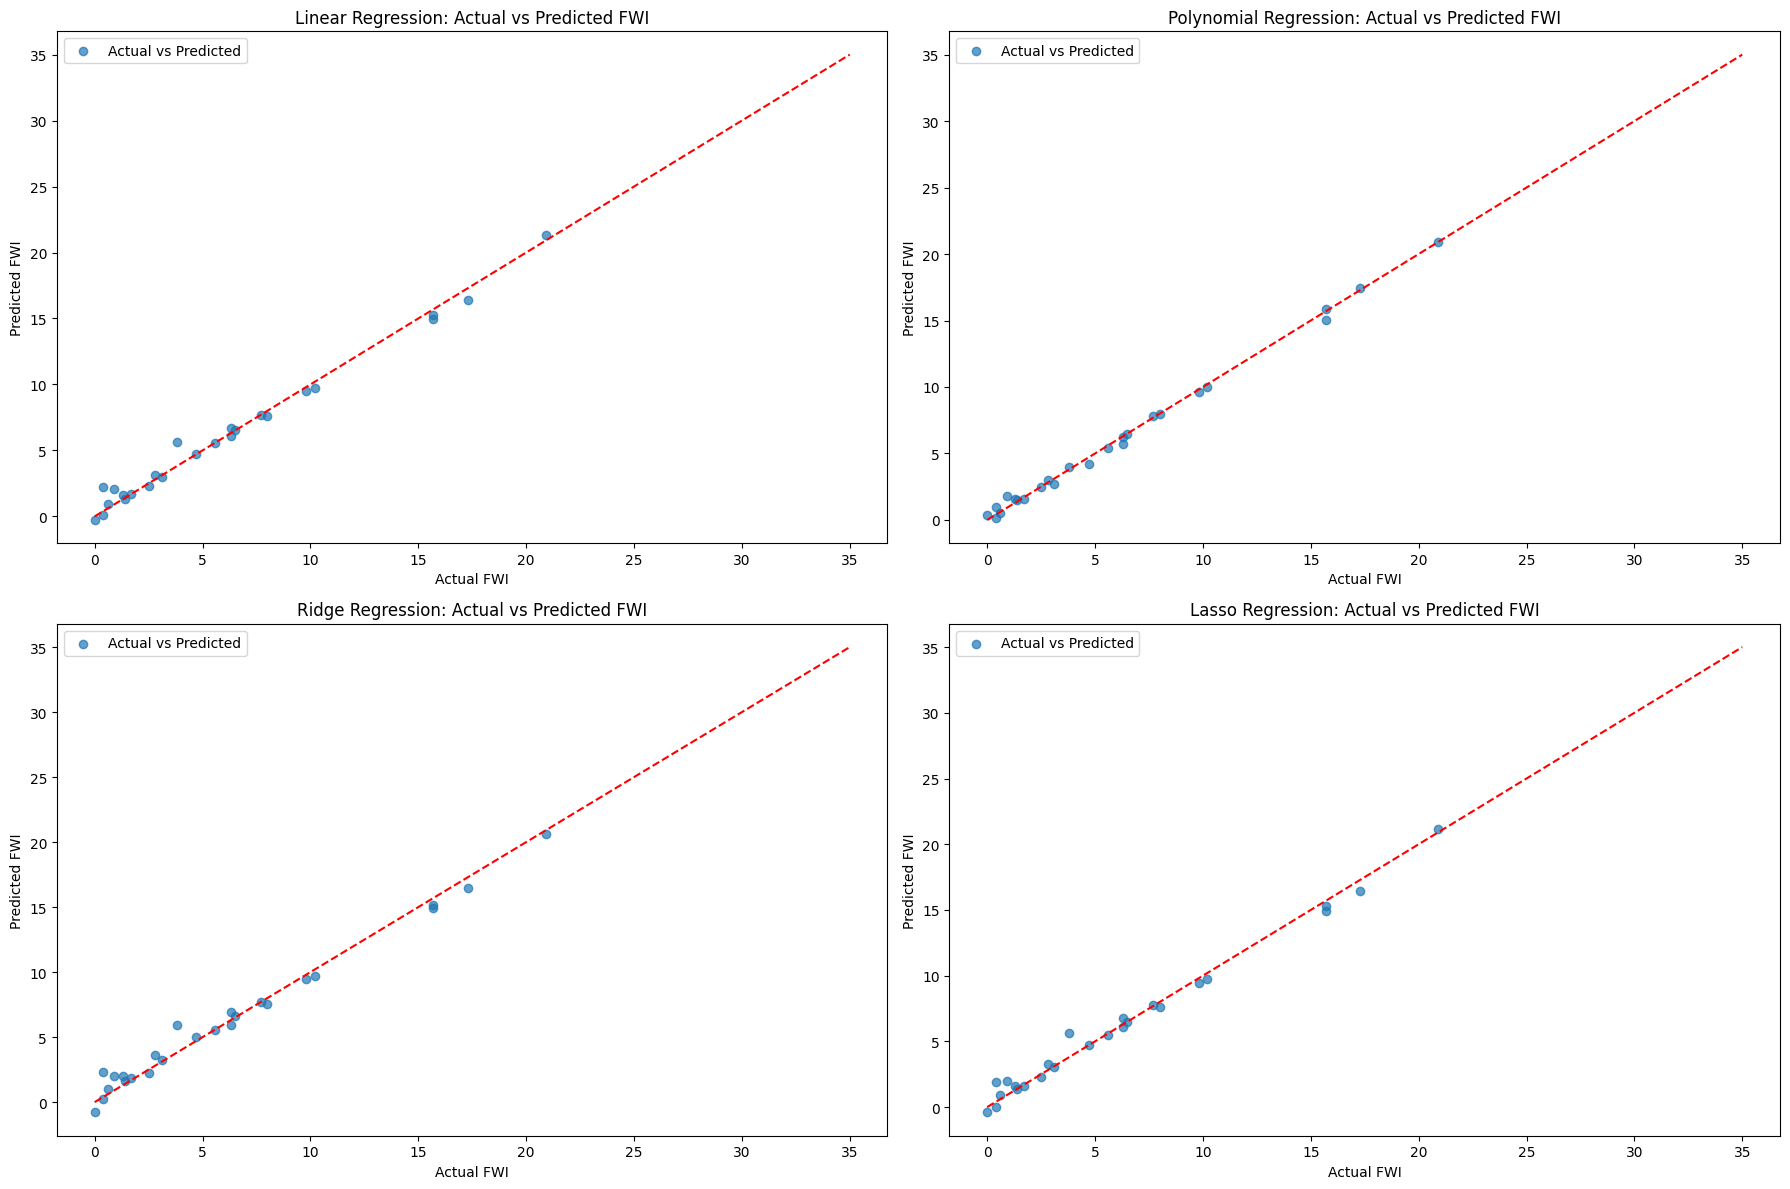

In [76]:
# Visualize the predictions vs actual values

plt.figure(figsize=(18, 12))

# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_unseen, y_pred_linear_unseen, alpha=0.7)
plt.plot([0, 35], [0, 35], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted FWI')
plt.xlabel('Actual FWI')
plt.legend(['Actual vs Predicted'])
plt.ylabel('Predicted FWI')

# Polynomial Regression
plt.subplot(2, 2, 2)
plt.scatter(y_unseen, y_pred_poly_unseen, alpha=0.7)
plt.plot([0, 35], [0, 35], color='red', linestyle='--')
plt.title('Polynomial Regression: Actual vs Predicted FWI')
plt.xlabel('Actual FWI')
plt.legend(['Actual vs Predicted'])
plt.ylabel('Predicted FWI')

# Ridge Regression
plt.subplot(2, 2, 3)
plt.scatter(y_unseen, y_pred_ridge_unseen, alpha=0.7)
plt.plot([0, 35], [0, 35], color='red', linestyle='--')
plt.title('Ridge Regression: Actual vs Predicted FWI')
plt.xlabel('Actual FWI')
plt.legend(['Actual vs Predicted'])
plt.ylabel('Predicted FWI')

# Lasso Regression
plt.subplot(2, 2, 4)
plt.scatter(y_unseen, y_pred_lasso_unseen, alpha=0.7)
plt.plot([0, 35], [0, 35], color='red', linestyle='--')
plt.title('Lasso Regression: Actual vs Predicted FWI')
plt.legend(['Actual vs Predicted'], loc='best')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')

plt.tight_layout()
plt.show()


The above scatter plots illustrate how good each model behaved on unseen data, bringing again the argument of our metrics. 

- Polynomial Regression: The values are very close to predictions indicating excellent performace. 
- Linear Regression: Fairly close between predictions and actual values 
